In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
df = pd.read_csv('cars_clean.csv')

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [4]:
df.tail()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,196,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,198,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [5]:
df.shape

(201, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [7]:
# do a cross correlation check
df.corr(numeric_only = True)

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155


In [8]:
# correlation with price
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
stroke               0.082269
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
Unnamed: 0          -0.118214
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [9]:
# find correlation of a subset of parameters
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


### Relationship Among Data

(0.0, 53143.56672458489)

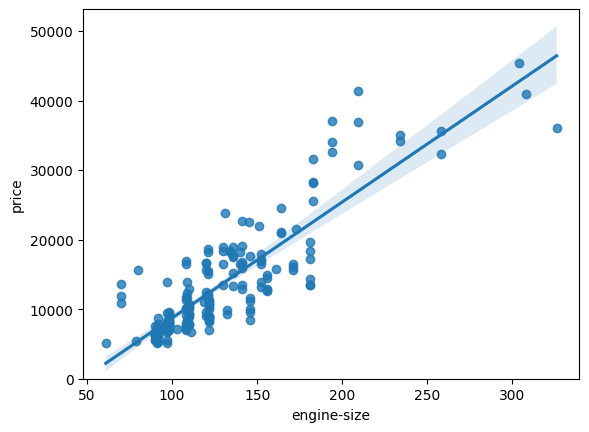

In [10]:
# check relationship between engine-size and price
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)

In [11]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [12]:
# correlation value between engine-size and price
df['engine-size'].corr(df['price'])

0.8723351674455189

<Axes: xlabel='highway-mpg', ylabel='price'>

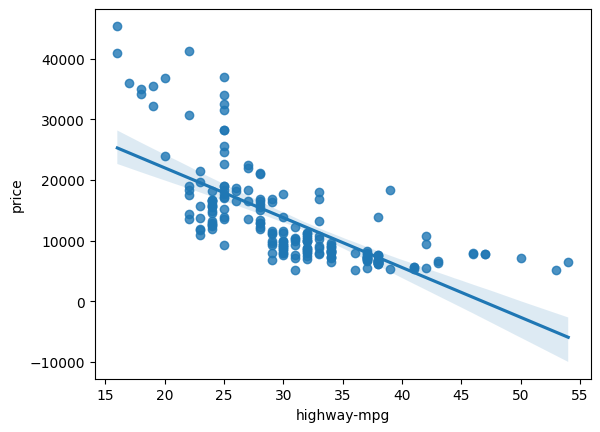

In [13]:
# highway-price vs price
sns.regplot(x = 'highway-mpg', y = 'price', data = df)

In [14]:
# correlation value between highway-mpg and price
df['highway-mpg'].corr(df['price'])

-0.7046922650589534

<Axes: xlabel='peak-rpm', ylabel='price'>

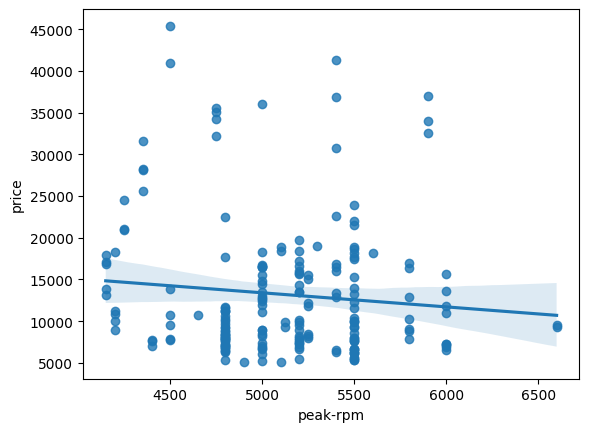

In [15]:
# peak-rpm vs price
sns.regplot(x = 'peak-rpm', y = 'price', data = df)

In [16]:
# corr value between peak rpm and price
df['peak-rpm'].corr(df['price'])

-0.1016158740758814

#### Categorical Variables

<Axes: xlabel='body-style', ylabel='price'>

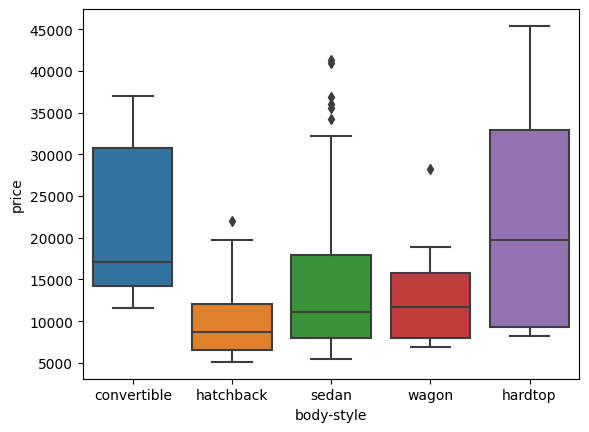

In [17]:
# boxplot of different body style prices
sns.boxplot(x = 'body-style', y = 'price', data = df)

<Axes: xlabel='engine-location', ylabel='price'>

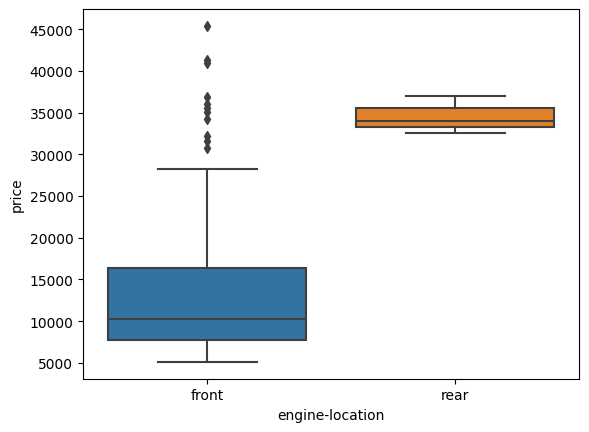

In [18]:
# boxplot of engine location and price
sns.boxplot(x = 'engine-location', y = 'price', data = df)

<Axes: xlabel='drive-wheels', ylabel='price'>

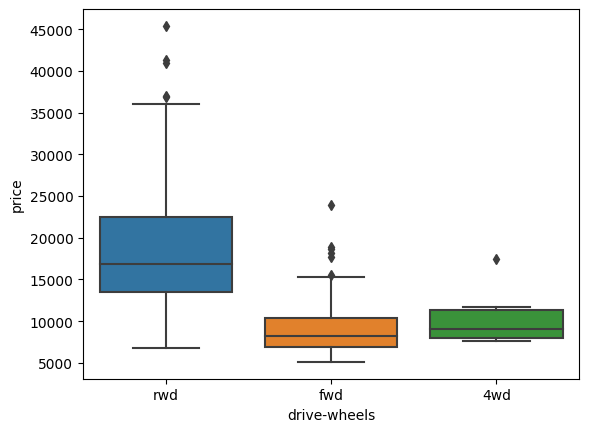

In [19]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

#### Grouping Data

In [20]:
# how many unique values for a categorical data column
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [21]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [22]:
# let us create a group
df_group_one = df[['drive-wheels', 'price']]

In [23]:
df_group_one

,drive-wheels,price
0,rwd,13495
1,rwd,16500
2,rwd,16500
3,fwd,13950
4,4wd,17450
...,...,...
196,rwd,16845
197,rwd,19045
198,rwd,21485
199,rwd,22470


In [24]:
# find the mean for each group
df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()

In [25]:
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


#### Correlation and Causation
P-value: probability that the correlation between two variables is statistically significant

##### p < 0.001: strong evidence that the correlation is significant
##### p < 0.05: moderate evidence that the correlation is significant
##### p < 0.1: weak evidence that the correlation is significant
##### p > 0.1: no evidence that the correlation is significant

In [26]:
# import the stats library
from scipy import stats

In [27]:
# compute the correlation coefficient and then the p-value between 'wheel-base' and 'price'
pearson_coeff, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Correlation coefficient =", pearson_coeff, " p-value =" , p_value)

Correlation coefficient = 0.5846418222655085  p-value = 8.076488270732338e-20


In [28]:
# compute the correlation coefficient and then the p-value between 'engine-size' and 'price'
pearson_coeff, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Correlation coefficient =", pearson_coeff, " p-value =" , p_value)

Correlation coefficient = 0.8723351674455186  p-value = 9.26549162219736e-64


##### Gives a good correlation coefficient, and the p-value indicates good confidence in that value

#### Pivot Tables

In [29]:
# grouping results
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [30]:
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [31]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

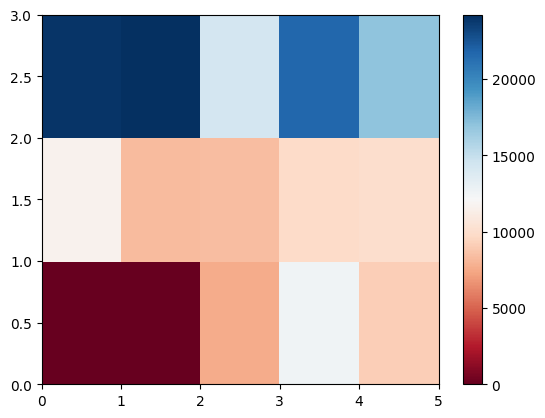

In [32]:
# use the grouped results
plt.pcolor(grouped_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

#### Analysis of Variance (ANOVA)
##### ANOVA returns two parameters
##### • F test score
##### • p value

In [33]:
grouped_test2 = df_gptest[['drive-wheels', 'price', ]].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495
1,rwd,16500
2,rwd,16500
3,fwd,13950
4,4wd,17450
5,fwd,15250
6,fwd,17710
7,fwd,18920
8,fwd,23875
9,rwd,16430


In [34]:
grouped_test2.get_group('4wd')['price']

4      17450
136     7603
140     9233
141    11259
144     8013
145    11694
150     7898
151     8778
Name: price, dtype: int64

In [35]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('rwd')['price'], 
                              grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F =", f_val, " P =", p_val)

ANOVA results: F = 67.95406500780399  P = 3.3945443577151245e-23


In [36]:
# 4wd and rws
f_val, p_val = stats.f_oneway(grouped_test2.get_group('rwd')['price'], 
                              grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F =", f_val, " P =", p_val)

ANOVA results: F = 8.580681368924756  P = 0.004411492211225333


In [37]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                              grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F =", f_val, " P =", p_val)

ANOVA results: F = 0.6654657502523033  P = 0.41620116697845666


#### Linear Regression

In [38]:
# import the linear regression model
from sklearn.linear_model import LinearRegression

In [39]:
# create a linear regression object
lm = LinearRegression()

In [40]:
# can highway-mpg predit car price
X = df[['highway-mpg']]
Y = df['price']

In [41]:
# fit the model
lm.fit(X, Y)

LinearRegression()

In [42]:
# output the prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [43]:
X[0:5]

,highway-mpg
0,27
1,27
2,26
3,30
4,22


In [44]:
# what is the intercept
lm.intercept_

38423.305858157415

In [45]:
# what is the slope
lm.coef_

array([-821.73337832])

#### R^2 Coefficient of Determination

In [46]:
print('R-squared = ', lm.score(X, Y))

R-squared =  0.4965911884339175


#### Mean Squared Error

In [47]:
# import mse module
from sklearn.metrics import mean_squared_error

In [51]:
# obtain mse
mse = mean_squared_error(df['price'], Yhat)
print("MSE =", mse)

MSE = 31635042.944639895


#### Multiple Linear Regression

In [52]:
# define predictor with multiple parameters
Z = df[['engine-size', 'highway-mpg']]

In [53]:
# create the model
lm.fit(Z, df['price'])

LinearRegression()

In [54]:
# value of the intercept
lm.intercept_

2903.795260341658

In [55]:
# value of the slope
lm.coef_

array([ 139.83785426, -242.40836682])

##### price = 2903.8 + (139.84 * engine-size) + (-242.41 * higheway-mpg)

In [59]:
Z = df[['curb-weight', 'horsepower', 'width']]
lm.fit(Z, df['price'])
lm.intercept_
lm.coef_
print("intercept:", lm.intercept_, "slope:", lm.coef_)

intercept: -56261.80852790874 slope: [  5.28117123  92.39520084 704.48498196]


#### price = -56261.81 + (5.28 * curb-weight) + (92.40 * horsepower) + (704.48 * width)